In [1]:
import datamol as dm
import matplotlib.pyplot as plt
from matplotlib.axis import Axis 
import pandas as pd
import numpy as np
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import random

In [34]:
data_cnr2 = pd.read_csv("chembl253_final.csv")
data_cnr2['id'].duplicated().sum()
data_cnr2.drop_duplicates(inplace=True, subset='id')

In [35]:
data_cnr2.describe()

,ki
count,4776.000000
mean,2127.888710
std,3845.052335
min,0.010000
25%,18.400000
50%,231.500000
75%,1847.750000
max,25000.000000


In [36]:
data_cnr2

,ki,id,smiles
0,630.96,CHEMBL1828806,CCCCCn1cc(C(=O)Nc2ccc3ccccc3c2)c2ccccc21
1,1000.00,CHEMBL157591,C/N=C(\NS(=O)(=O)c1cccc(C(F)(F)F)c1)N1CC(c2ccc...
2,1000.00,CHEMBL583855,CCc1c(C(=O)NN2CCCCC2)nc(-c2ccccc2Cl)n1-c1ccc(C...
3,1578.00,CHEMBL590481,CC(C)CNC(=O)[C@@H]1CC[C@@H](c2ccc(Cl)cc2Cl)N(c...
4,7.80,CHEMBL2348469,CC1(C)Oc2cc(C34CC5CC(CC(C5)C3)C4)cc(O)c2[C@@H]...
...,...,...,...
5389,1000.00,CHEMBL5085413,CCN(CC)S(=O)(=O)/N=C(/N=C(\N)C(C)(C)C)N1CC(c2c...
5390,1000.00,CHEMBL5081512,C/C(N)=N\C(=N\S(=O)(=O)N1CCCCC1)N1C[C@@H](c2cc...
5391,1000.00,CHEMBL5075684,CCN(CC)S(=O)(=O)/N=C(/N=C(\N)c1ccc(F)cc1)N1CC(...
5392,1000.00,CHEMBL5084642,N/C(=N\C(=N\S(=O)(=O)N1CCCC1)N1CC(c2ccccc2)C(c...


In [37]:
min_ki_idx = data_cnr2['ki'].idxmin()
max_ki_idx = data_cnr2['ki'].idxmax()
min_max_idx = [min_ki_idx, max_ki_idx]
remaining_idx = data_cnr2.index.difference(min_max_idx)
random.seed(42)
random_rows=random.sample(range(1, 4776), 498) 
rows = list(min_max_idx) + list(random_rows)

In [38]:
rows_set = {*rows}

In [39]:
len(rows_set)

500

In [40]:
data_cnr2 = data_cnr2.iloc[rows]

In [41]:
data_cnr2['ki'].describe()

count      500.000000
mean      2177.574818
std       4040.322278
min          0.020000
25%         16.000000
50%        214.500000
75%       1752.500000
max      25000.000000
Name: ki, dtype: float64

<Axes: ylabel='Density'>

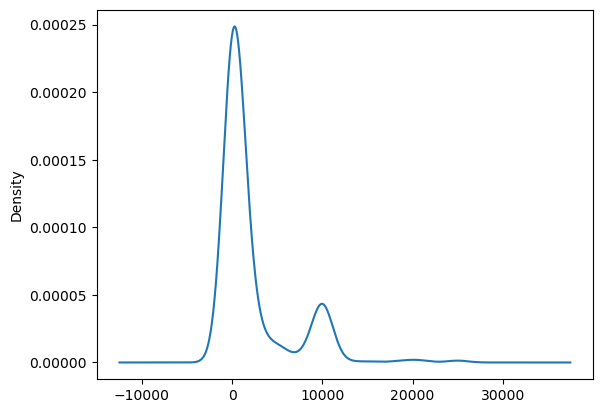

In [42]:
data_cnr2['ki'].plot.density()

In [6]:
# mols_cnr2 = data_cnr2['smiles'].tolist()
reference_mols_cnr2 = ['CC1=C(N(N=C1C(=O)NC23CC4CC(C2)CC(C4)C3)CCCCCO)C5=CC=CC=C5', 
                       'CC1([C@@H]2CC[C@H](C[C@H]2C3=C(C=C(C=C3O1)C(C)(C)CCCCCC#N)O)CO)C', 
                       'CC1=C(C2=C3N1[C@@H](COC3=CC=C2)CN4CCOCC4)C(=O)C5=CC=CC6=CC=CC=C65', 
                       'CCCCCCC(C)(C)C1=CC(=C(C(=C1)OC)[C@H]2C=C([C@H]3C[C@@H]2C3(C)C)CO)OC', 
                       'CCCCCCC(C)(C)C1=CC(=C(C=C1)[C@@H]2C[C@@H](CC[C@H]2CCCO)O)O', 
                       'CC(C)CN1C(=O)CN(C1=O)CC2=CC=C(C=C2)C3=NC(=C(C=C3)F)CNC4CCOCC4', 
                       'CC(C)(C)[C@@H](CO)NC(=O)C1=NN(C2=C1C[C@H]3[C@@H]2C3)C4=NC=C[N+](=C4)[O-]']
reference_receptors_cnr2 = ['5ZTY', '6KPF', '6PT0', '8GUS', '8GUR', '8GUT', '8GUQ']

In [7]:
def calculate_tanimoto_similarity(input_smiles, reference_mols_list, reference_receptors_list):
    tanimoto_distance = dm.similarity.cdist(input_smiles, reference_mols_list, distances_chunk=False)
    tanimoto_similarity = 1 - tanimoto_distance
    calculated_df = pd.DataFrame(data=tanimoto_similarity, columns=reference_receptors_list)
    return calculated_df

In [45]:
data = calculate_tanimoto_similarity(data_cnr2['smiles'].tolist(), reference_mols_cnr2, reference_receptors_cnr2)

In [46]:
data.describe()

,5ZTY,6KPF,6PT0,8GUS,8GUR,8GUT,8GUQ
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.122802,0.094447,0.107957,0.097702,0.108290,0.095454,0.088607
std,0.050823,0.064093,0.046974,0.067285,0.064657,0.025625,0.021672
min,0.052632,0.023438,0.036232,0.025210,0.035398,0.037037,0.036496
25%,0.092308,0.061162,0.079137,0.061896,0.075000,0.076923,0.074012
50%,0.111111,0.074728,0.094891,0.084040,0.095652,0.092199,0.088573
75%,0.133929,0.095813,0.120467,0.113937,0.125263,0.110251,0.101562
max,0.388350,0.530612,0.366667,1.000000,1.000000,0.181159,0.177966


In [47]:
max_tanimoto_values = data.iloc[:, 0:].max(axis=1)

In [48]:
max_tanimoto_columns = data.iloc[:, 0:].idxmax(axis=1)

(array([  5.,  37.,  82., 117.,  52.,  45.,  36.,  25.,  12.,  20.,  20.,
         17.,   9.,   2.,   3.,   4.,   6.,   1.,   1.,   0.,   1.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([0.06521739, 0.08391304, 0.1026087 , 0.12130435, 0.14      ,
        0.15869565, 0.1773913 , 0.19608696, 0.21478261, 0.23347826,
        0.25217391, 0.27086957, 0.28956522, 0.30826087, 0.32695652,
        0.34565217, 0.36434783, 0.38304348, 0.40173913, 0.42043478,
        0.43913043, 0.45782609, 0.47652174, 0.49521739, 0.51391304,
        0.5326087 , 0.55130435, 0.57      , 0.58869565, 0.6073913 ,
        0.62608696, 0.64478261, 0.66347826, 0.68217391, 0.70086957,
        0.71956522, 0.73826087, 0.75695652, 0.77565217, 0.79434783,
        0.81304348, 0.83173913, 0.85043478, 0.86913043, 0.88782609,
        0.90652174, 0.92521739, 0.94391304, 0.

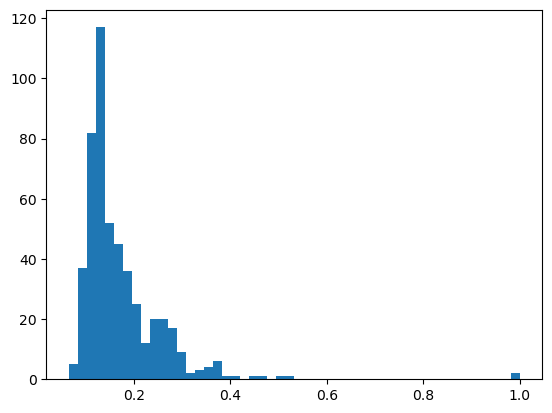

In [49]:
plt.hist(max_tanimoto_values, bins=50)

In [12]:
def check_boundary(tanimoto_values: pd.Series) -> list():
    upper_bound = list()
    lower_bound = list()
    for value_id in range(0, len(tanimoto_values)):
        if tanimoto_values[value_id] >= 0.5:
            upper_bound.append(value_id)
        elif tanimoto_values[value_id] < 0.5:
            lower_bound.append(value_id)
    return [upper_bound, lower_bound]

In [51]:
boundaries = check_boundary(max_tanimoto_values)

In [52]:
data_cnr2.iloc[boundaries[0]]

,ki,id,smiles
831,11.2,CHEMBL2179724,CCCCCCC(C)(C)c1cc(OC)c([C@H]2C=C(CO)[C@H]3C[C@...
4666,3.1,CHEMBL4470925,CCCCOC(=O)C(C)(C)c1cc(O)c2c(c1)OC(C)(C)[C@@H]1...
2187,1.8,CHEMBL77520,CCCCCCC(C)(C)c1ccc(C2CC(O)CCC2CCCO)c(O)c1
2266,700.0,CHEMBL264412,CCCCC(C)(C)c1ccc([C@@H]2C[C@H](O)CC[C@H]2CCCO)cc1


In [53]:
max_tanimoto_columns.iloc[boundaries[0]]

37     8GUS
133    6KPF
276    8GUR
411    8GUR
dtype: object

In [54]:
data_cnr2['id'].iloc[boundaries[1]]

822     CHEMBL2414029
29      CHEMBL1269772
954     CHEMBL3353442
207     CHEMBL1641963
2462     CHEMBL250609
            ...      
3911    CHEMBL3220955
4088    CHEMBL2030929
1377    CHEMBL3605033
4354     CHEMBL591066
4123     CHEMBL250768
Name: id, Length: 496, dtype: object

In [16]:
def sort_smiles_by_receptor(experiment_file_name: str, 
                            reference_receptors: list, 
                            id_column: pd.Series,
                            boundary_values: list,
                            smiles_data: pd.Series, 
                            tanimoto_receptors: pd.Series,
                            high_resolution_receptor_id: str):
    chembl_file = f'{experiment_file_name}.smi'
    for i in reference_receptors:
        os.makedirs(i, exist_ok=True)
        file_path = os.path.join(i, chembl_file) 
        with open(file_path, 'w') as f:
            f.write("") 
    tanimoto_receptors_upper = max_tanimoto_columns.iloc[boundary_values[0]]
    for chembl_id, smiles, receptor_id in zip(id_column.iloc[boundary_values[0]], smiles_data.iloc[boundary_values[0]], tanimoto_receptors_upper):
            with open(f'{receptor_id}/{chembl_file}', "a") as f_out:
                f_out.write(f'{smiles}\t{chembl_id}\t{receptor_id}\n')
                
    tanimoto_receptors_lower = max_tanimoto_columns.iloc[boundary_values[1]]
    for chembl_id, smiles, receptor_id in zip(id_column.iloc[boundary_values[1]], smiles_data.iloc[boundary_values[1]], tanimoto_receptors_lower):
            with open(f'{high_resolution_receptor_id}/{chembl_file}', "a") as f_out:
                f_out.write(f'{smiles}\t{chembl_id}\t{receptor_id}\n')

In [249]:
sort_smiles_by_receptor("experiment", reference_receptors_cnr2, 
                        data_cnr2['id'], boundaries, 
                        data_cnr2['smiles'], max_tanimoto_columns, "5ZTY")

In [176]:
tanimoto_recep

Series([], dtype: object)

In [3]:
reference_mols_cnr1 = [
    'CC1=C(N(N=C1C(=O)NN2CCCCC2)C3=C(C=C(C=C3)Cl)Cl)C4=CC=C(C=C4)C#CCCO[N+](=O)[O-]',
    'C[C@@H]([C@@H](CC1=CC=C(C=C1)Cl)C2=CC=CC(=C2)C#N)NC(=O)C(C)(C)OC3=NC=C(C=C3)C(F)(F)F',
    'CC1([C@@H]2CC[C@H](C[C@H]2C3=C(C=C(C=C3O1)C(C)(C)CCCCCCN=C=S)O)CO)C',
    'CC1=CC[C@@H]2[C@@H](C1)C3=C(C=C(C=C3OC2(C)C)C(C)(C)CCCCCCBr)O',
    'CCC1=C(NC2=C1C=C(C=C2)Cl)C(=O)NCCC3=CC=C(C=C3)N4CCCCC4',
    'CCCCCCC(C)(C)C1=CC(=C(C=C1)[C@@H]2C[C@@H](CC[C@H]2CCCO)O)O',
    'CC(C)(C)[C@@H](C(=O)OC)NC(=O)C1=NN(C2=CC=CC=C21)CC3=CC=C(C=C3)F',
    'CC1([C@@H]2CC[C@H](C[C@H]2C3=C(C=C(C=C3O1)C(C)(C)CCCCCCN=C=S)O)CO)C',
    'CCCCC/C=C\[C@H](C)/C=C\C/C=C\C/C=C\CCCC(=O)N[C@H](C)CO'
]
reference_receptors_cnr1 = ['5TGZ', '5U09', '5XR8', '5XRA', '6KQI', '7FEE', '6N4B', '6KPG', '8GHV']

In [4]:
data_cnr1 = pd.read_csv("chembl218_final.csv")

In [5]:
data_cnr1.describe()

,ki
count,4103.000000
mean,3699.047013
std,7428.612046
min,0.000350
25%,36.250000
50%,640.000000
75%,4761.500000
max,116800.000000


In [6]:
min_ki_idx = data_cnr1['ki'].idxmin()
max_ki_idx = data_cnr1['ki'].idxmax()
min_max_idx = [min_ki_idx, max_ki_idx]
remaining_idx = data_cnr1.index.difference(min_max_idx)
random.seed(42)
random_rows=random.sample(range(1, 4103), 498) 
rows = list(min_max_idx) + list(random_rows)

In [7]:
rows_set = {*rows}
len(rows_set)

500

In [25]:
data_cnr1 = data_cnr1.iloc[rows]

In [26]:
data_cnr1.describe()

,ki
count,500.000000
mean,3627.021628
std,9012.851782
min,0.000350
25%,45.000000
50%,682.500000
75%,3763.000000
max,116800.000000


<Axes: ylabel='Density'>

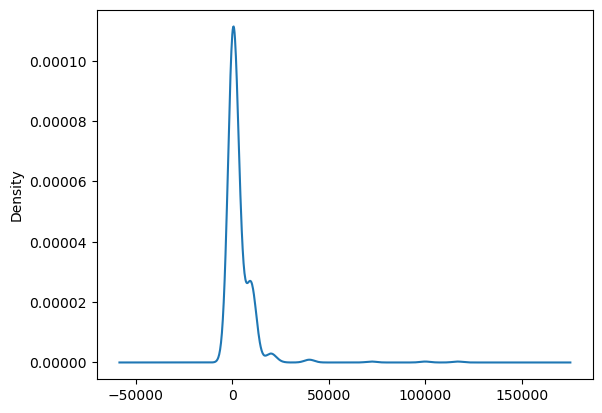

In [27]:
data_cnr1['ki'].plot.density()

In [28]:
data = calculate_tanimoto_similarity(data_cnr1['smiles'].tolist(), reference_mols_cnr1, reference_receptors_cnr1)

In [29]:
max_tanimoto_values = data.iloc[:, 0:].max(axis=1)
max_tanimoto_columns = data.iloc[:, 0:].idxmax(axis=1)

(array([17., 47., 74., 98., 74., 41., 23., 21., 14., 11., 10.,  8.,  8.,
        10.,  4.,  7.,  1.,  4.,  3.,  5.,  2.,  2.,  2.,  3.,  1.,  1.,
         1.,  2.,  1.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.08130081, 0.09775699, 0.11421316, 0.13066934, 0.14712552,
        0.16358169, 0.18003787, 0.19649404, 0.21295022, 0.22940639,
        0.24586257, 0.26231874, 0.27877492, 0.29523109, 0.31168727,
        0.32814345, 0.34459962, 0.3610558 , 0.37751197, 0.39396815,
        0.41042432, 0.4268805 , 0.44333667, 0.45979285, 0.47624903,
        0.4927052 , 0.50916138, 0.52561755, 0.54207373, 0.5585299 ,
        0.57498608, 0.59144225, 0.60789843, 0.62435461, 0.64081078,
        0.65726696, 0.67372313, 0.69017931, 0.70663548, 0.72309166,
        0.73954783, 0.75600401, 0.77246018, 0.78891636, 0.80537254,
        0.82182871, 0.83828489, 0.85474106, 0.87119724, 0.88765341,
        0.90410959]),
 <BarContainer

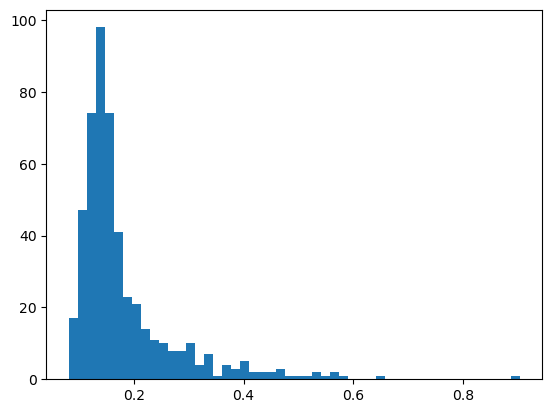

In [30]:
plt.hist(max_tanimoto_values, bins=50)

In [31]:
boundaries = check_boundary(max_tanimoto_values)

In [36]:
len(boundaries[0])

9

In [33]:
max_tanimoto_columns.iloc[boundaries[0]].unique()

array(['5XRA', '5TGZ'], dtype=object)

In [34]:
sort_smiles_by_receptor("experiment_cnr1", reference_receptors_cnr1, 
                        data_cnr1['id'], boundaries, 
                        data_cnr1['smiles'], max_tanimoto_columns, "5U09")

In [35]:
data_cnr1['smiles']

296     O=C(NN1CCCCC1)c1nn(-c2ccc(Cl)cc2Cl)c2c1CCCc1cc...
504     Cc1ccc(Cn2nc(C(=O)N[C@@H]3C(C)(C)[C@@H]4CC[C@@...
913            CN(C)CCn1cc(C(=O)C2C(C)(C)C2(C)C)c2ccccc21
205              Cc1nc(N2CCN(C)CC2)c2nc(-c3ccccc3Cl)oc2n1
2254    O=C(N[C@@H]1CCCC[C@H]1O)c1cnc(OC2CCCC2)c(-c2cc...
                              ...                        
1240       CCCCC1(c2cc(OC)c3cc(Cc4ccncc4)c(=O)oc3c2)CCCC1
2506    COc1ccc(-c2c(C)c(C(=O)NC3(C#N)CCCCC3)nn2-c2ccc...
4045        CCCCC1(c2cc(O)c3cc(-c4ccccc4)c(=O)oc3c2)CCCC1
2679    CS(=O)(=O)O.Cc1c(C(=O)c2cccc3ccccc23)c2cccc3c2...
2167    CCCc1c(CC)cc(C(=O)NC2(C(=O)O)CCCCC2)c(=O)n1Cc1...
Name: smiles, Length: 500, dtype: object

In [8]:
supecomp = pd.read_csv("supercomp.smi", delimiter="\t", names=["smiles", "id"])

In [9]:
data = calculate_tanimoto_similarity(supecomp['smiles'].tolist(), reference_mols_cnr2, reference_receptors_cnr2)

(array([14., 26., 26., 12., 11.,  3.,  3.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0.07142857, 0.09      , 0.10857143, 0.12714286, 0.14571429,
        0.16428571, 0.18285714, 0.20142857, 0.22      , 0.23857143,
        0.25714286, 0.27571429, 0.29428571, 0.31285714, 0.33142857,
        0.35      , 0.36857143, 0.38714286, 0.40571429, 0.42428571,
        0.44285714, 0.46142857, 0.48      , 0.49857143, 0.51714286,
        0.53571429, 0.55428571, 0.57285714, 0.59142857, 0.61      ,
        0.62857143, 0.64714286, 0.66571429, 0.68428571, 0.70285714,
        0.72142857, 0.74      , 0.75857143, 0.77714286, 0.79571429,
        0.81428571, 0.83285714, 0.85142857, 0.87      , 0.88857143,
        0.90714286, 0.92571429, 0.94428571, 0.96285714, 0.98142857,
        1.        ]),
 <BarContainer

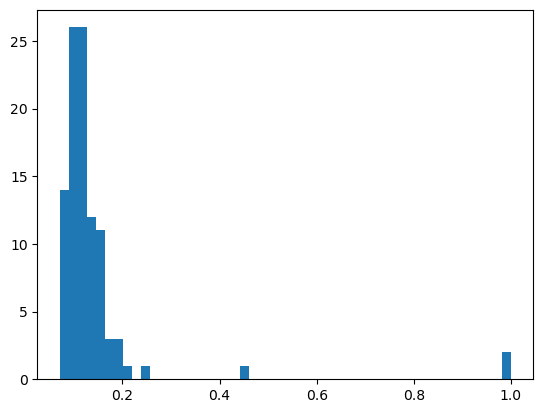

In [10]:
max_tanimoto_values = data.iloc[:, 0:].max(axis=1)
max_tanimoto_columns = data.iloc[:, 0:].idxmax(axis=1)
plt.hist(max_tanimoto_values, bins=50)

In [13]:
boundaries = check_boundary(max_tanimoto_values)

In [15]:
max_tanimoto_columns.iloc[boundaries[0]].unique()

array(['6KPF', '8GUR'], dtype=object)

In [18]:
sort_smiles_by_receptor("supercomp_cnr2", reference_receptors_cnr2, 
                        supecomp['id'], boundaries, 
                        supecomp['smiles'], max_tanimoto_columns, "5ZTY")